<a href="https://colab.research.google.com/github/bhave068/Devanagiri-Recognizer/blob/master/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#standard useful data processing imports
import random
import numpy as np
import pandas as pd
#visualisation imports
import matplotlib.pyplot as plt
import seaborn as sns
#Scikit learn for preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
#keras imports
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical



In [1]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
dataset=pd.read_csv('/content/drive/My Drive/data.csv')

In [48]:
print(dataset.head())

   pixel_0000  pixel_0001  pixel_0002  ...  pixel_1022  pixel_1023        character
0           0           0           0  ...           0           0  character_01_ka
1           0           0           0  ...           0           0  character_01_ka
2           0           0           0  ...           0           0  character_01_ka
3           0           0           0  ...           0           0  character_01_ka
4           0           0           0  ...           0           0  character_01_ka

[5 rows x 1025 columns]


In [47]:
dataset.shape

(92000, 1025)

In [49]:
df=dataset['character'].value_counts()
print(type(df))

<class 'pandas.core.series.Series'>


In [50]:
df.head()
len(df)

46

In [0]:
df

character_26_yaw             2000
character_14_dhaa            2000
digit_0                      2000
character_32_patalosaw       2000
digit_2                      2000
character_02_kha             2000
digit_6                      2000
character_16_tabala          2000
character_04_gha             2000
character_29_waw             2000
digit_4                      2000
digit_5                      2000
character_31_petchiryakha    2000
character_34_chhya           2000
digit_7                      2000
character_27_ra              2000
character_09_jha             2000
character_03_ga              2000
character_15_adna            2000
character_19_dha             2000
character_25_ma              2000
character_23_ba              2000
character_35_tra             2000
character_22_pha             2000
character_01_ka              2000
character_21_pa              2000
character_07_chha            2000
digit_8                      2000
character_18_da              2000
character_11_t

In [0]:
x=dataset.values[:,:-1]/255.0
y=dataset['character'].values
del dataset
n_classes=46

In [52]:
print(type(x),type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


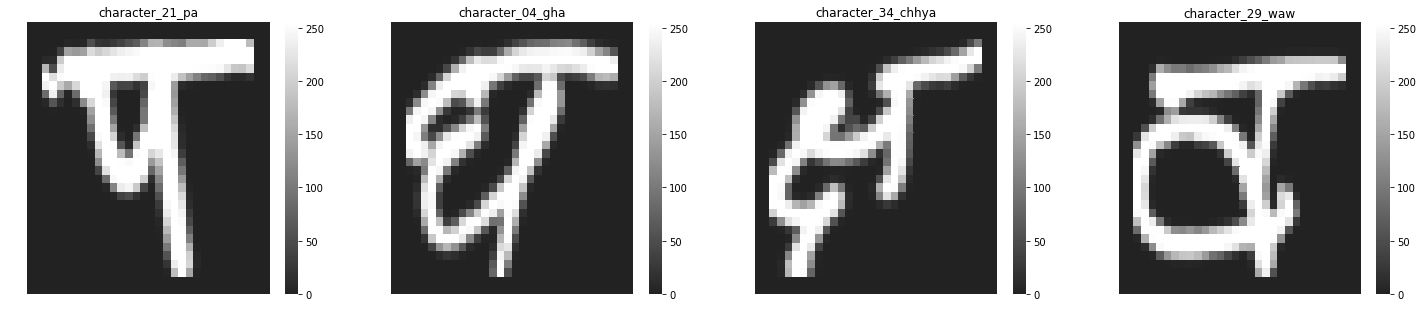

In [53]:
img_width_cols=32
img_height_rows=32
customcmap=sns.dark_palette("white",as_cmap=True)
random_idxs=random.sample(range(1,len(y)),4)
plt_dims=(25,5)
f, axarr = plt.subplots(1, 4, figsize=plt_dims)
it = 0
for idx in random_idxs:
    image = x[idx,:].reshape(img_width_cols,img_height_rows)*255
    axarr[it].set_title(y[idx])
    axarr[it].axis('off')
    sns.heatmap(data=image.astype(np.uint8),cmap=customcmap,ax=axarr[it])
    it=it+1

In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
le=LabelEncoder()
y_train=le.fit_transform(y_train)
y_test=le.transform(y_test)
y_train=to_categorical(y_train,n_classes)
y_test=to_categorical(y_test,n_classes)

In [55]:
x_train.shape

(73600, 1024)

In [0]:
im_shape=(img_height_rows,img_width_cols,1)
x_train=x_train.reshape(x_train.shape[0],*im_shape)
x_test=x_test.reshape(x_test.shape[0],*im_shape)

In [0]:
cnn = Sequential()

In [58]:
kernelSize=(3,3)
ip_activation="relu"
ip_conv0=Conv2D(filters=32,kernel_size=kernelSize,input_shape=im_shape,activation=ip_activation)
cnn.add(ip_conv_0)

ValueError: ignored

In [0]:
ip_conv_0_1=Conv2D(filters=64,kernel_size=kernelSize,activation=ip_activation)
cnn.add(ip_conv_0_1)

In [0]:
pool_0=MaxPool2D(pool_size=(2,2),strides=(2,2),padding="same")

In [0]:
cnn.add(pool_0)
ip_conv_1=Conv2D(filters=64,kernel_size=kernelSize,activation=ip_activation)
cnn.add(ip_conv_1)
pool_1 = MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same")
cnn.add(pool_1)

In [0]:
drop_layer_0 = Dropout(0.2)
cnn.add(drop_layer_0)

In [0]:
flat_layer_0=Flatten()
cnn.add(Flatten())

In [0]:
h_dense_0=Dense(units=128,activation=ip_activation,kernel_initializer='uniform')
cnn.add(h_dense_0)
h_dense_1=Dense(units=64,activation=ip_activation,kernel_initializer='uniform')
cnn.add(h_dense_1)

In [0]:
op_activation='softmax'
output_layer=Dense(units=n_classes,activation=op_activation,kernel_initializer='uniform')
cnn.add(output_layer)

In [0]:
opt='adam'
loss='categorical_crossentropy'
metrics=['accuracy']
cnn.compile(optimizer=opt, loss=loss, metrics=metrics)

#Tensorboard

In [60]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

--2019-06-25 06:28:56--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.200.123.104, 52.200.233.201, 34.206.130.40, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.200.123.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17556757 (17M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  16.74M  6.57MB/s    in 2.5s    

2019-06-25 06:29:00 (6.57 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [17556757/17556757]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [61]:
import tensorboardcolab as tbc
tboard = tbc.TensorBoardColab()
from tensorboardcolab import TensorBoardColabCallback

Wait for 8 seconds...
TensorBoard link:
https://1f886a03.ngrok.io


In [0]:
get_ipython().system_raw('./ngrok http 6006 &')

https://70b2e008.ngrok.io


In [71]:
'''from keras.callbacks import TensorBoard
tbCallBack = TensorBoard(log_dir='./log', histogram_freq=1,
                         write_graph=True,
                         write_grads=True,
                         batch_size=32,
                         write_images=True)'''
history=cnn.fit(x_train,y_train,batch_size=32,epochs=10,verbose=1,validation_data=(x_test,y_test),callbacks=[TensorBoardColabCallback(tboard)])

Train on 73600 samples, validate on 18400 samples
Epoch 1/10
73600/73600 [==============================] - 34s 461us/step - loss: 0.6797 - acc: 0.7997 - val_loss: 0.2631 - val_acc: 0.9187
Epoch 2/10
73600/73600 [==============================] - 33s 445us/step - loss: 0.2014 - acc: 0.9372 - val_loss: 0.1906 - val_acc: 0.9403
Epoch 3/10
73600/73600 [==============================] - 33s 444us/step - loss: 0.1322 - acc: 0.9586 - val_loss: 0.1283 - val_acc: 0.9636
Epoch 4/10
73600/73600 [==============================] - 33s 446us/step - loss: 0.0963 - acc: 0.9701 - val_loss: 0.1291 - val_acc: 0.9633
Epoch 5/10
73600/73600 [==============================] - 33s 443us/step - loss: 0.0748 - acc: 0.9761 - val_loss: 0.1195 - val_acc: 0.9667
Epoch 6/10
73600/73600 [==============================] - 32s 439us/step - loss: 0.0593 - acc: 0.9806 - val_loss: 0.1126 - val_acc: 0.9691
Epoch 7/10
73600/73600 [==============================] - 32s 441us/step - loss: 0.0499 - acc: 0.9839 - val_loss: 0.

In [72]:
scores=cnn.evaluate(x_test,y_test,verbose=0)
print("Accuracy:%.2f%%" % (scores[1]*100))

Accuracy:96.90%


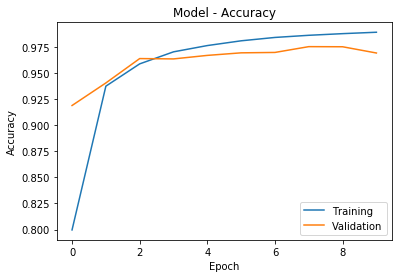

In [73]:
print(history)
fig1, ax_acc = plt.subplots()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model - Accuracy')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()
